In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 读取数据
df_schi=pd.read_csv('dataset/mental_health/share-of-population-with-schizophrenia.csv')
df_bp=pd.read_csv('dataset/mental_health/share-with-bipolar-disorder.csv')
df_depression=pd.read_csv('dataset/mental_health/share-with-depression.csv')
df_ms=pd.read_csv('dataset/mental_health/share-with-mental-and-substance-disorders.csv')

In [14]:
# 设置索引
df_schi.index=df_schi['Entity']
df_bp.index=df_bp['Entity']
df_depression.index=df_depression['Entity']
df_ms.index=df_ms['Entity']

In [15]:
# 求不同国家四种疾病的平均发生率
df_schi=df_schi.groupby(df_schi.index).agg({'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)':'mean'})
df_bp=df_bp.groupby(df_bp.index).agg({'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)':'mean'})
df_depression=df_depression.groupby(df_depression.index).agg({'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)':'mean'})
df_ms=df_ms.groupby(df_ms.index).agg({'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)':'mean'})

In [16]:
# 合并数据表
df_merge=pd.merge(df_schi,df_depression,left_index=True,right_index=True)
df_merge=pd.merge(df_merge,df_bp,left_index=True,right_index=True)
df_merge=pd.merge(df_merge,df_ms,left_index=True,right_index=True)

In [17]:
df_merge

,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)
Entity,,,,
Afghanistan,0.223667,5.109000,0.721000,17.400000
African Region (WHO),0.220000,4.690667,0.582667,12.395000
Albania,0.302667,2.587667,0.576333,11.630333
Algeria,0.260000,4.351000,0.796000,14.852000
American Samoa,0.324667,2.780000,0.293000,11.148667
...,...,...,...,...
World Bank Lower Middle Income,0.280000,3.929667,0.425333,13.089000
World Bank Upper Middle Income,0.305333,3.357667,0.455333,12.569667
Yemen,0.239000,5.016333,0.743667,15.977667


In [18]:
df_merge.columns=['schiz','depression','bp','ms']

In [19]:
##生成四种疾病prevalence的数据框
df_merge

,schiz,depression,bp,ms
Entity,,,,
Afghanistan,0.223667,5.109000,0.721000,17.400000
African Region (WHO),0.220000,4.690667,0.582667,12.395000
Albania,0.302667,2.587667,0.576333,11.630333
Algeria,0.260000,4.351000,0.796000,14.852000
American Samoa,0.324667,2.780000,0.293000,11.148667
...,...,...,...,...
World Bank Lower Middle Income,0.280000,3.929667,0.425333,13.089000
World Bank Upper Middle Income,0.305333,3.357667,0.455333,12.569667
Yemen,0.239000,5.016333,0.743667,15.977667


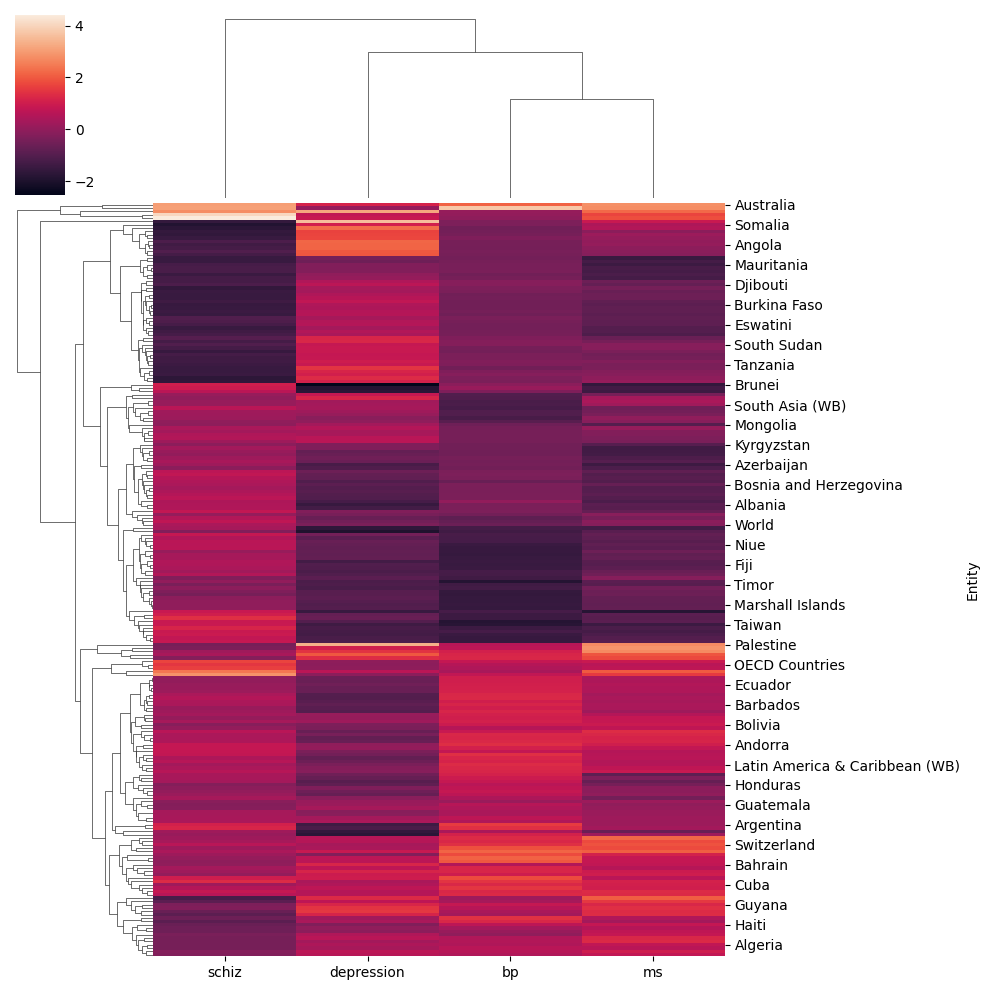

In [20]:
##直接对国家和疾病进行聚类，发现Bipolar disorder和mental and substance use距离较近
sns.clustermap(df_merge,z_score=1)

<AxesSubplot:>

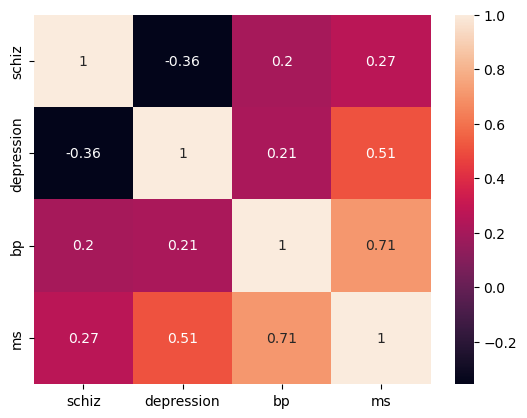

In [10]:
##查看了一下疾病之间的correlation并画图
from scipy import stats
sns.heatmap(df_merge.corr(),annot=True)

In [ ]:
## 可以看到bp和ms的相关性比较高

In [22]:
##读取国家的人口、经济、健康信息，以及标签转换的表格
df_demographic=pd.read_csv('dataset/mental_health/demographics.csv')
df_economy=pd.read_csv('dataset/mental_health/economy.csv')
df_health=pd.read_csv('dataset/mental_health/health.csv')
df_index=pd.read_csv('dataset/mental_health/index.csv')

In [23]:
##建立临时列表，储存三个信息数据框中公有的国家
tmp_list=[]
for i in df_demographic['location_key'].astype(str).to_list():
    if '_' not in i:
        tmp_list.append(i)

In [24]:
df_demographic=df_demographic[df_demographic['location_key'].isin(tmp_list)]

In [25]:
df_demographic.index=df_demographic['location_key']

In [26]:
df_economy.index=df_economy['location_key']

In [27]:
df_health.index=df_health['location_key']

In [28]:
inter_key=list(set(df_demographic.index.to_list())&set(df_economy.index.to_list())&set(df_health.index.to_list()))

In [29]:
df_demographic=df_demographic[df_demographic.index.isin(inter_key)]
df_economy=df_economy[df_economy.index.isin(inter_key)]
df_health=df_health[df_health.index.isin(inter_key)]

In [30]:
##将三个数据框的index换成国家便于解读
df_index.index=df_index['location_key']

In [31]:
df_demographic.index=df_demographic['location_key']
df_demographic=pd.merge(df_index['country_name'],df_demographic,left_index=True,right_index=True)
df_demographic.drop('location_key',axis=1,inplace=True)
df_demographic.index=df_demographic['country_name']
df_demographic.drop('country_name',axis=1,inplace=True)

In [32]:
df_health.index=df_demographic.index

In [33]:
df_economy.index=df_demographic.index

In [34]:
##统一疾病数据框与信息数据框的国家
inter_countries_2=list(set(df_merge.index.to_list())&set(df_demographic.index.to_list()))

In [35]:
##一共179个国家可以分析
len(inter_countries_2)

179

In [36]:
df_merge=df_merge[df_merge.index.isin(inter_countries_2)]
df_demographic=df_demographic[df_demographic.index.isin(inter_countries_2)]
df_economy=df_economy[df_economy.index.isin(inter_countries_2)]
df_health=df_health[df_health.index.isin(inter_countries_2)]

In [37]:
df_demographic.dropna(axis=1,inplace=True)

In [38]:
df_economy.dropna(axis=1,inplace=True)
df_economy.drop('location_key',axis=1,inplace=True)

In [39]:
df_health.dropna(axis=1,inplace=True)
df_health.drop('location_key',axis=1,inplace=True)


In [40]:
df_merge

,schiz,depression,bp,ms
Entity,,,,
Afghanistan,0.223667,5.109000,0.721000,17.400000
Albania,0.302667,2.587667,0.576333,11.630333
Algeria,0.260000,4.351000,0.796000,14.852000
Andorra,0.319667,3.947667,1.025667,15.413000
Angola,0.216333,5.913667,0.560000,13.520000
...,...,...,...,...
Vanuatu,0.280000,3.091333,0.270000,11.909000
Vietnam,0.323333,2.608333,0.345333,9.819667
Yemen,0.239000,5.016333,0.743667,15.977667


In [41]:
df_economy

,gdp_usd,gdp_per_capita_usd
country_name,,
Andorra,3.154058e+09,40886.0
United Arab Emirates,4.211423e+11,43103.0
Afghanistan,1.910135e+10,502.0
Antigua and Barbuda,1.727759e+09,17790.0
Albania,1.527808e+10,5352.0
...,...,...
Samoa,8.506550e+08,4315.0
Yemen,2.759126e+10,968.0
South Africa,3.514316e+11,6001.0


In [43]:
##由于gpd_usd和population相关，故我们用gdp_per_capita_usd代表国家经济水平更合适
from scipy import stats
stats.pearsonr(df_economy['gdp_per_capita_usd'],df_demographic['population'])

(-0.07671947146308192, 0.3073724909784775)

In [44]:
stats.pearsonr(df_economy['gdp_usd'],df_demographic['population'])

(0.7573858520313482, 1.355361397753252e-34)

In [45]:
df_economy['tag']=df_economy['gdp_per_capita_usd']>df_economy['gdp_per_capita_usd'].mean(axis=0)

In [46]:
df_economy

,gdp_usd,gdp_per_capita_usd,tag
country_name,,,
Andorra,3.154058e+09,40886.0,True
United Arab Emirates,4.211423e+11,43103.0,True
Afghanistan,1.910135e+10,502.0,False
Antigua and Barbuda,1.727759e+09,17790.0,True
Albania,1.527808e+10,5352.0,False
...,...,...,...
Samoa,8.506550e+08,4315.0,False
Yemen,2.759126e+10,968.0,False
South Africa,3.514316e+11,6001.0,False


In [47]:
df_health

,diabetes_prevalence
country_name,
Andorra,7.7
United Arab Emirates,16.3
Afghanistan,9.2
Antigua and Barbuda,13.1
Albania,9.0
...,...
Samoa,9.2
Yemen,5.4
South Africa,12.7


In [48]:
df_health['diabetes_prevalence'].mean(axis=0)

8.404469273743016

In [49]:
df_health['tag']=df_health['diabetes_prevalence']<df_health['diabetes_prevalence'].mean(axis=0)

In [50]:
df_health

,diabetes_prevalence,tag
country_name,,
Andorra,7.7,True
United Arab Emirates,16.3,False
Afghanistan,9.2,False
Antigua and Barbuda,13.1,False
Albania,9.0,False
...,...,...
Samoa,9.2,False
Yemen,5.4,True
South Africa,12.7,False


In [51]:
##此处是简化人口信息
df_demographic

,population,population_male,population_female,population_rural,population_urban,population_density,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
country_name,,,,,,,,,,,,,,,
Andorra,77265.0,58625.0,55581.0,9269.0,67873.0,164.394,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
United Arab Emirates,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,118.306,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
Afghanistan,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,59.627,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
Antigua and Barbuda,97928.0,47269.0,50659.0,73318.0,23800.0,222.564,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
Albania,2862427.0,1429594.0,1432833.0,1106598.0,1747593.0,99.600,319074.0,381542.0,474360.0,366807.0,339697.0,398271.0,315510.0,190753.0,52224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,198410.0,102703.0,95707.0,161509.0,35588.0,70.110,51123.0,41998.0,31295.0,22012.0,19560.0,16470.0,9960.0,4580.0,1412.0
Yemen,29825968.0,15024985.0,14800983.0,18292399.0,10869523.0,56.492,8033408.0,6750274.0,5732746.0,4140438.0,2362804.0,1422835.0,879450.0,403471.0,100542.0
South Africa,59308690.0,29216012.0,30092678.0,19408553.0,39149717.0,48.891,11585605.0,10409174.0,10141489.0,10155325.0,7043275.0,4911532.0,3164441.0,1476055.0,421794.0


In [53]:
df_demographic['male_female_rate']=df_demographic['population_male']/df_demographic['population_female']

In [54]:
df_demographic['urban_rural_rate']=df_demographic['population_urban']/df_demographic['population_rural']

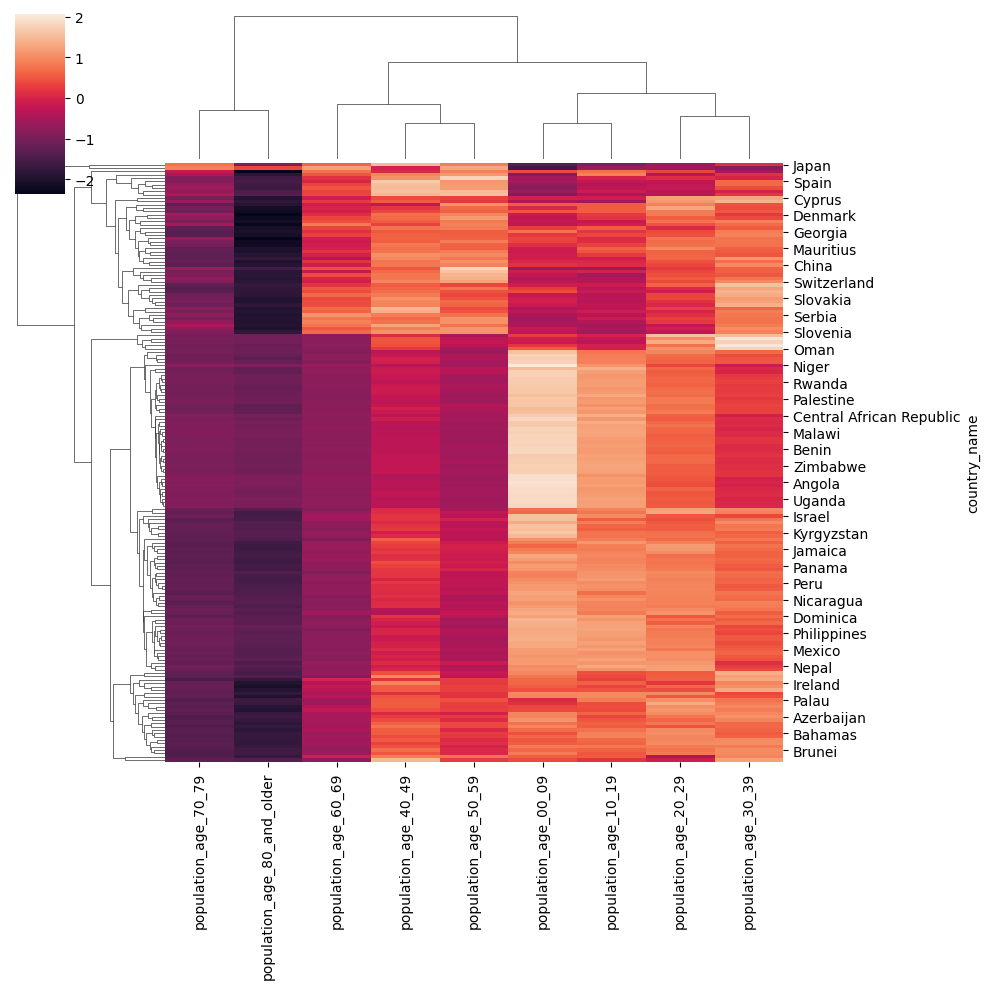

In [55]:
##发现70_79和80以上聚成明显的一簇，于是我们以此为界限定义国家老龄比
sns.clustermap(df_demographic.iloc[:,6:15],z_score=0)

In [43]:
df_demographic['old_rate']=(df_demographic['population_age_70_79']+df_demographic['population_age_80_and_older'])/(df_demographic['population_age_00_09']+df_demographic['population_age_10_19']+df_demographic['population_age_20_29']+df_demographic['population_age_30_39']+df_demographic['population_age_40_49']+df_demographic['population_age_50_59']+df_demographic['population_age_60_69'])

In [44]:
df_demographic=df_demographic.iloc[:,[0,5,15,16,17]]

In [45]:
##由于人口信息不同于健康信息，不能以好坏划分，暂时保留此数据框
df_demographic

,population,population_density,male_female_rate,urban_rural_rate,old_rate
country_name,,,,,
Andorra,77265.0,164.394,1.054767,7.322581,0.134483
United Arab Emirates,9890400.0,118.306,2.238453,6.569447,0.006955
Afghanistan,38928341.0,59.627,1.054041,0.346874,0.015293
Antigua and Barbuda,97928.0,222.564,0.933082,0.324613,0.062437
Albania,2862427.0,99.600,0.997739,1.579248,0.093623
...,...,...,...,...,...
Samoa,198410.0,70.110,1.073098,0.220347,0.031141
Yemen,29825968.0,56.492,1.015134,0.594210,0.017189
South Africa,59308690.0,48.891,0.970868,2.017137,0.033057


In [46]:
df_economy

,gdp_usd,gdp_per_capita_usd,tag
country_name,,,
Andorra,3.154058e+09,40886.0,True
United Arab Emirates,4.211423e+11,43103.0,True
Afghanistan,1.910135e+10,502.0,False
Antigua and Barbuda,1.727759e+09,17790.0,True
Albania,1.527808e+10,5352.0,False
...,...,...,...
Samoa,8.506550e+08,4315.0,False
Yemen,2.759126e+10,968.0,False
South Africa,3.514316e+11,6001.0,False


In [47]:
df_health

,diabetes_prevalence,tag
country_name,,
Andorra,7.7,True
United Arab Emirates,16.3,False
Afghanistan,9.2,False
Antigua and Barbuda,13.1,False
Albania,9.0,False
...,...,...
Samoa,9.2,False
Yemen,5.4,True
South Africa,12.7,False


In [48]:
economy_high=df_economy[df_economy['tag']].index.to_list()
economy_low=df_economy[-df_economy['tag']].index.to_list()

In [49]:
health_well=df_health[df_health['tag']].index.to_list()
health_bad=df_health[-df_health['tag']].index.to_list()

In [50]:
##分为经济高健康指数高（0），经济高健康指数低（1），经济低健康指数高（2），经济低健康指数低（3）四组
country_0=list(set(economy_high)&set(health_well))
country_1=list(set(economy_high)&set(health_bad))
country_2=list(set(economy_low)&set(health_well))
country_3=list(set(economy_low)&set(health_bad))

In [51]:
##中国被分在了经济低健康指数低的国家中
'China' in country_3

True

In [52]:
tag_list=[]
for i in df_merge.index.to_list():
    if i in country_0:
        tag_list.append(0)
    elif i in country_1:
        tag_list.append(1)
    elif i in country_2:
        tag_list.append(2)
    else:
        tag_list.append(3)


In [53]:
df_merge['tag']=tag_list

C:\Users\Admin\AppData\Local\Temp\ipykernel_29136\3783718799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['tag']=tag_list


In [54]:
df_merge

,schiz,depression,bp,ms,tag
Entity,,,,,
Afghanistan,0.223667,5.109000,0.721000,17.400000,3
Albania,0.302667,2.587667,0.576333,11.630333,3
Algeria,0.260000,4.351000,0.796000,14.852000,2
Andorra,0.319667,3.947667,1.025667,15.413000,0
Angola,0.216333,5.913667,0.560000,13.520000,2
...,...,...,...,...,...
Vanuatu,0.280000,3.091333,0.270000,11.909000,3
Vietnam,0.323333,2.608333,0.345333,9.819667,2
Yemen,0.239000,5.016333,0.743667,15.977667,2


In [55]:
df_merge_test=df_merge.copy()

In [56]:
df_merge_test.index=df_merge_test['tag']

In [57]:
df_merge_test

,schiz,depression,bp,ms,tag
tag,,,,,
3,0.223667,5.109000,0.721000,17.400000,3
3,0.302667,2.587667,0.576333,11.630333,3
2,0.260000,4.351000,0.796000,14.852000,2
0,0.319667,3.947667,1.025667,15.413000,0
2,0.216333,5.913667,0.560000,13.520000,2
...,...,...,...,...,...
3,0.280000,3.091333,0.270000,11.909000,3
2,0.323333,2.608333,0.345333,9.819667,2
2,0.239000,5.016333,0.743667,15.977667,2


In [58]:
df_merge_test.drop('tag',axis=1,inplace=True)

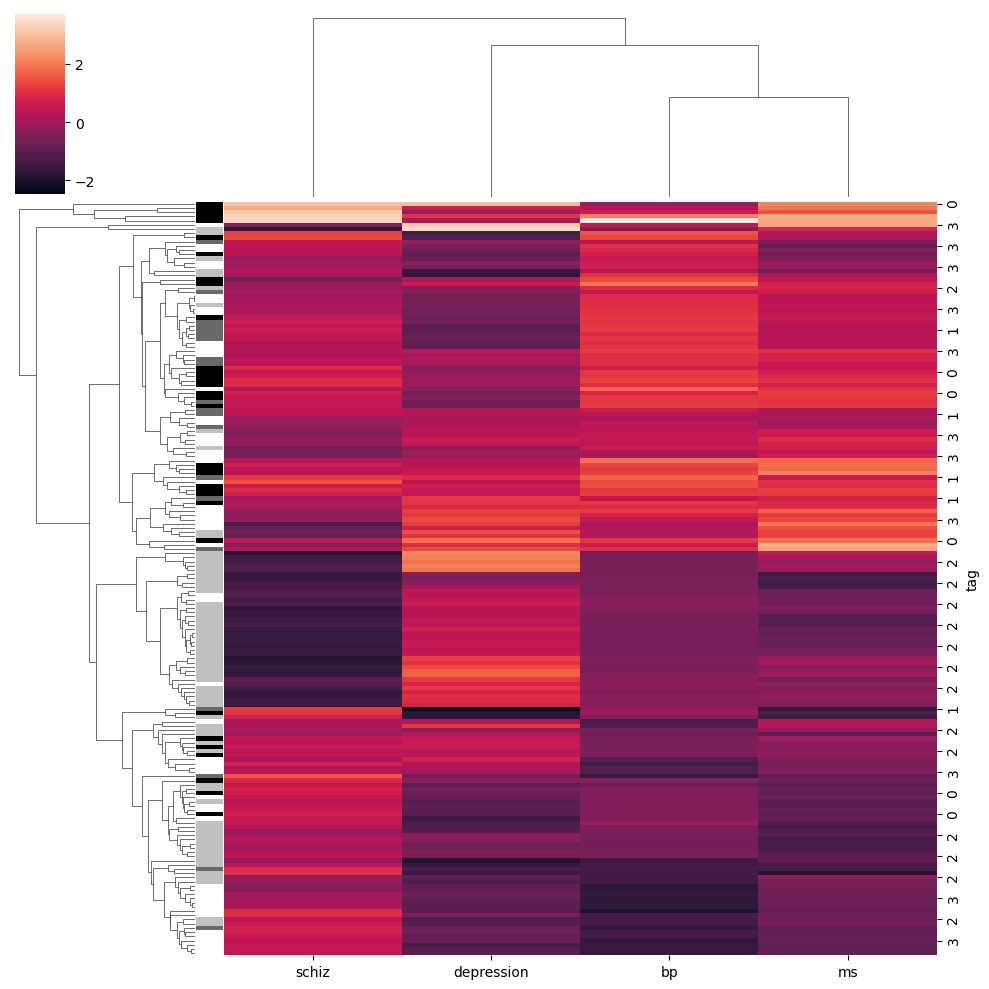

In [59]:
##发现颜色深的国家（即经济高健康高，以及经济高健康指数低的国家发病率高；经济低健康指数高的国家发病率低）
##除此之外我们发现浅灰色国家存在一个比较有意思的pattern：它们在精神分裂和抑郁的prevalence上分布不同，可以在浅灰色国家基础上将这两组国家找出分析影响它们之间的各方面水平的差异
row_c={0:'black',1:'dimgray',2:'silver',3:'white'}
sns.clustermap(data=df_merge_test,row_colors=df_merge_test.index.map(row_c),z_score=1)

In [60]:
##demographic的那个表格可以用上分析其他东西